# <center>`PROBLEM STATEMENT`</center>

### `Objective:`  
- The goal of this project is to develop a linear regression model to predict the prices of houses based on their square footage, number of bedrooms, and number of bathrooms. This predictive model can be used by real estate agents, potential buyers, and sellers to estimate the market value of a property.

## `-> Importing Libraries`


In [49]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error

import joblib
import pickle

In [50]:
train_data = pd.read_csv('../data/ML_01_train.csv')
test_data = pd.read_csv('../data/ML_01_test.csv')

## `-> Information about data`

In [51]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [52]:
print(f'Number of rows -> {train_data.shape[0]}', f'\nNumber of columns -> {train_data.shape[1]}')

Number of rows -> 1460 
Number of columns -> 81


In [53]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [54]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [55]:
print(train_data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

###  Features that the model should be trained on:
- Square footage
- Number of bedrooms
- Number of bathrooms

### Here are the feature names pertaining to square footage, number of bedrooms, and number of bathrooms from the dataset:
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second Floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- GarageArea: Size of garage in square feet
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square - feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- BedroomAbvGr: Bedrooms above grade (does not include basement bedrooms)
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

In [56]:
selected_features = [
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'TotRmsAbvGrd',
    'SalePrice'
]

In [57]:
fdata = train_data.loc[:,selected_features]
fdata.head()

,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
0,856,854,0,1710,548,0,61,0,0,0,0,1,0,2,1,3,8,208500
1,1262,0,0,1262,460,298,0,0,0,0,0,0,1,2,0,3,6,181500
2,920,866,0,1786,608,0,42,0,0,0,0,1,0,2,1,3,6,223500
3,961,756,0,1717,642,0,35,272,0,0,0,1,0,1,0,3,7,140000
4,1145,1053,0,2198,836,192,84,0,0,0,0,1,0,2,1,4,9,250000


In [58]:
fdata.describe()

,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,0.425342,0.057534,1.565068,0.382877,2.866438,6.517808,180921.195890
std,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,0.518911,0.238753,0.550916,0.502885,0.815778,1.625393,79442.502883
min,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,34900.000000
25%,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,5.000000,129975.000000
50%,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,6.000000,163000.000000
75%,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,7.000000,214000.000000
max,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,3.000000,2.000000,3.000000,2.000000,8.000000,14.000000,755000.000000


## `1. Data Preparation`

- Handling Null Values
- Handling Duplicates

In [59]:
null_cols = list()
for col in fdata.columns:
    if fdata[col].isnull().sum() != 0: null_cols.append(col)
print(f'\033[1mAll the columns containing null values ->\033[0m',null_cols)

All the columns containing null values -> []


In [60]:
dups = fdata.duplicated().sum()
print(f'There were \033[1m{dups}\033[0m duplicates in the data')
fdata = fdata.drop_duplicates()
print(f'There are \033[1m{fdata.duplicated().sum()}\033[0m duplicates in the data')

There were 1 duplicates in the data
There are 0 duplicates in the data


## `2. Exploratory Data Analysis`

In [61]:
fdata.head()

,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
0,856,854,0,1710,548,0,61,0,0,0,0,1,0,2,1,3,8,208500
1,1262,0,0,1262,460,298,0,0,0,0,0,0,1,2,0,3,6,181500
2,920,866,0,1786,608,0,42,0,0,0,0,1,0,2,1,3,6,223500
3,961,756,0,1717,642,0,35,272,0,0,0,1,0,1,0,3,7,140000
4,1145,1053,0,2198,836,192,84,0,0,0,0,1,0,2,1,4,9,250000


### `2.1 Data Visualization`

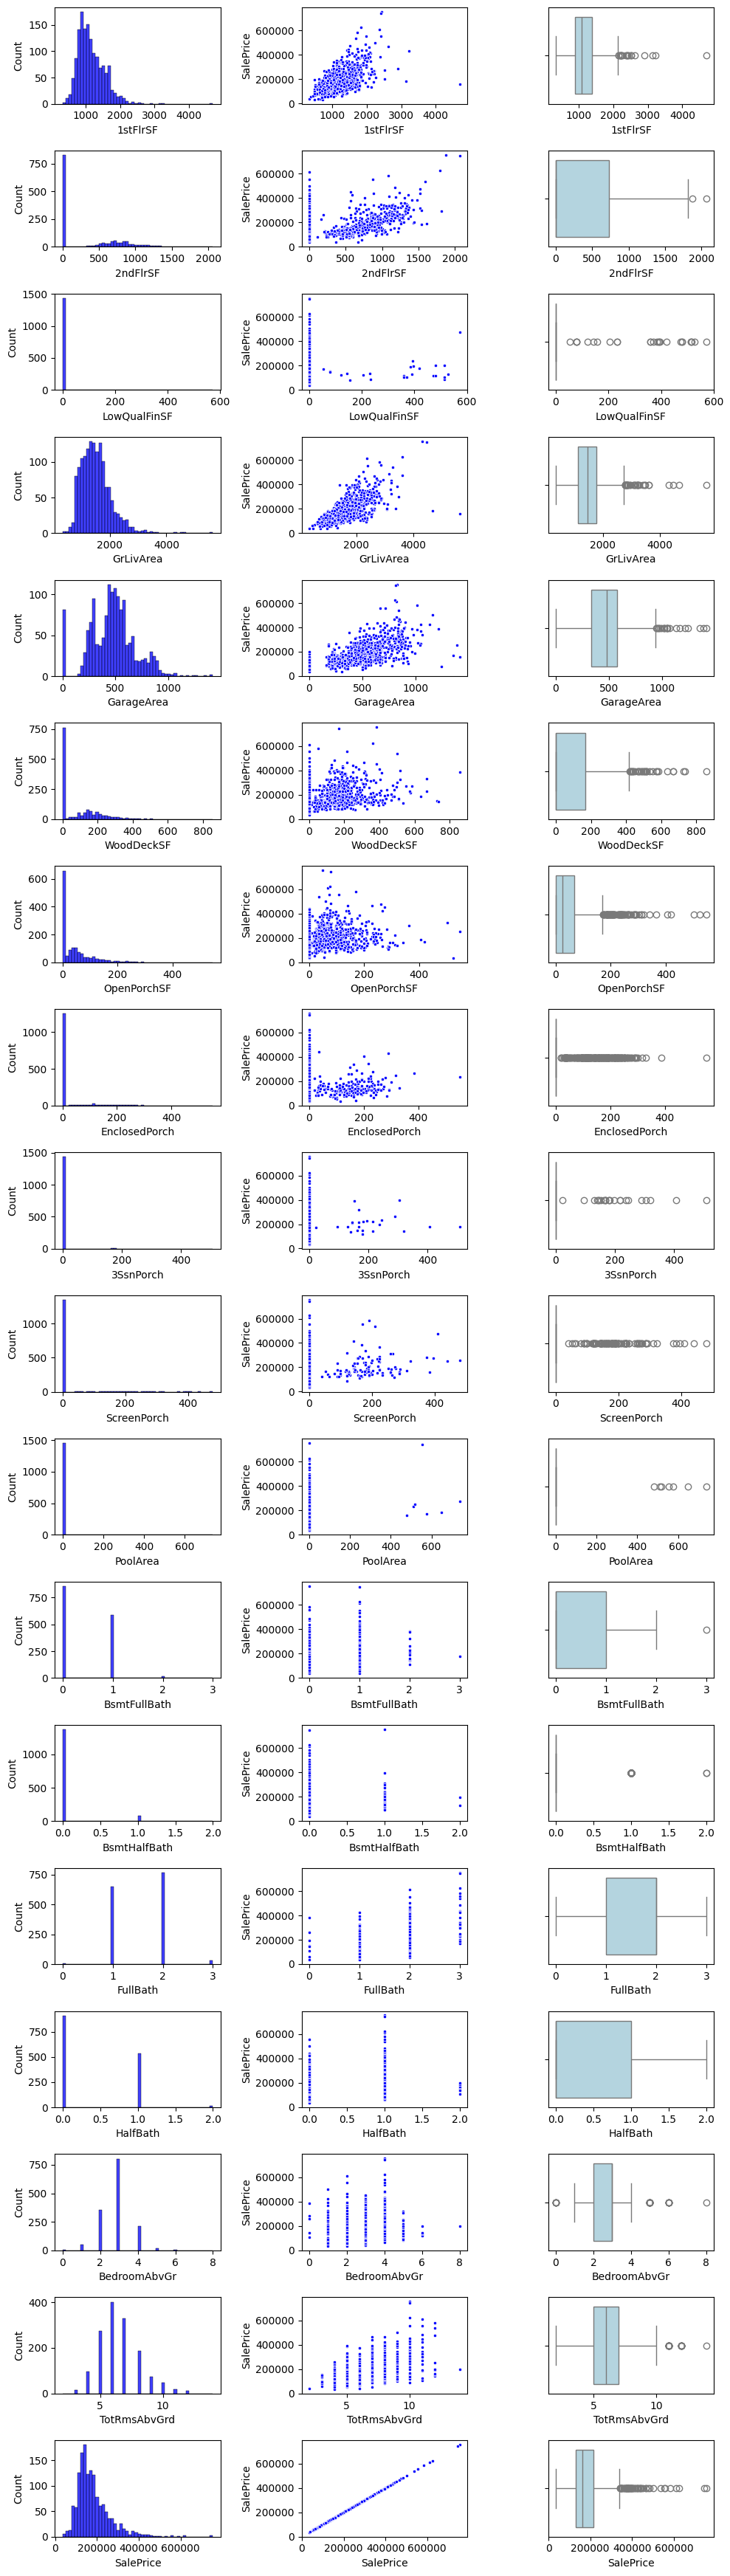

In [62]:
fig, ax = plt.subplots(nrows = len(fdata.columns), ncols = 3, figsize= (10,35))
for index, col in enumerate(fdata.columns):
    sns.histplot(x = fdata[col], ax = ax[index,0], bins = 50, color = 'blue')
    sns.scatterplot(x = fdata[col], y=fdata['SalePrice'], ax = ax[index,1], marker = '.', color = 'blue')
    sns.boxplot(data = fdata[col], ax = ax[index,2], orient = 'h', color = 'lightblue')
    fig.tight_layout()
plt.show()

- Conclusion
    - By the above visualization, we can remove <b>'3SsnProch', 'PoolArea', 'EnclosedPorch', 'ScreenPorch'</b>

In [63]:
try:
    fdata = fdata.drop(columns = ['3SsnPorch', 'PoolArea', 'EnclosedPorch', 'ScreenPorch'], axis = 1)
except: pass
fdata.head()

,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
0,856,854,0,1710,548,0,61,1,0,2,1,3,8,208500
1,1262,0,0,1262,460,298,0,0,1,2,0,3,6,181500
2,920,866,0,1786,608,0,42,1,0,2,1,3,6,223500
3,961,756,0,1717,642,0,35,1,0,1,0,3,7,140000
4,1145,1053,0,2198,836,192,84,1,0,2,1,4,9,250000


### `2.3 Plotting the Correlation of Predicting Features over Target Features`

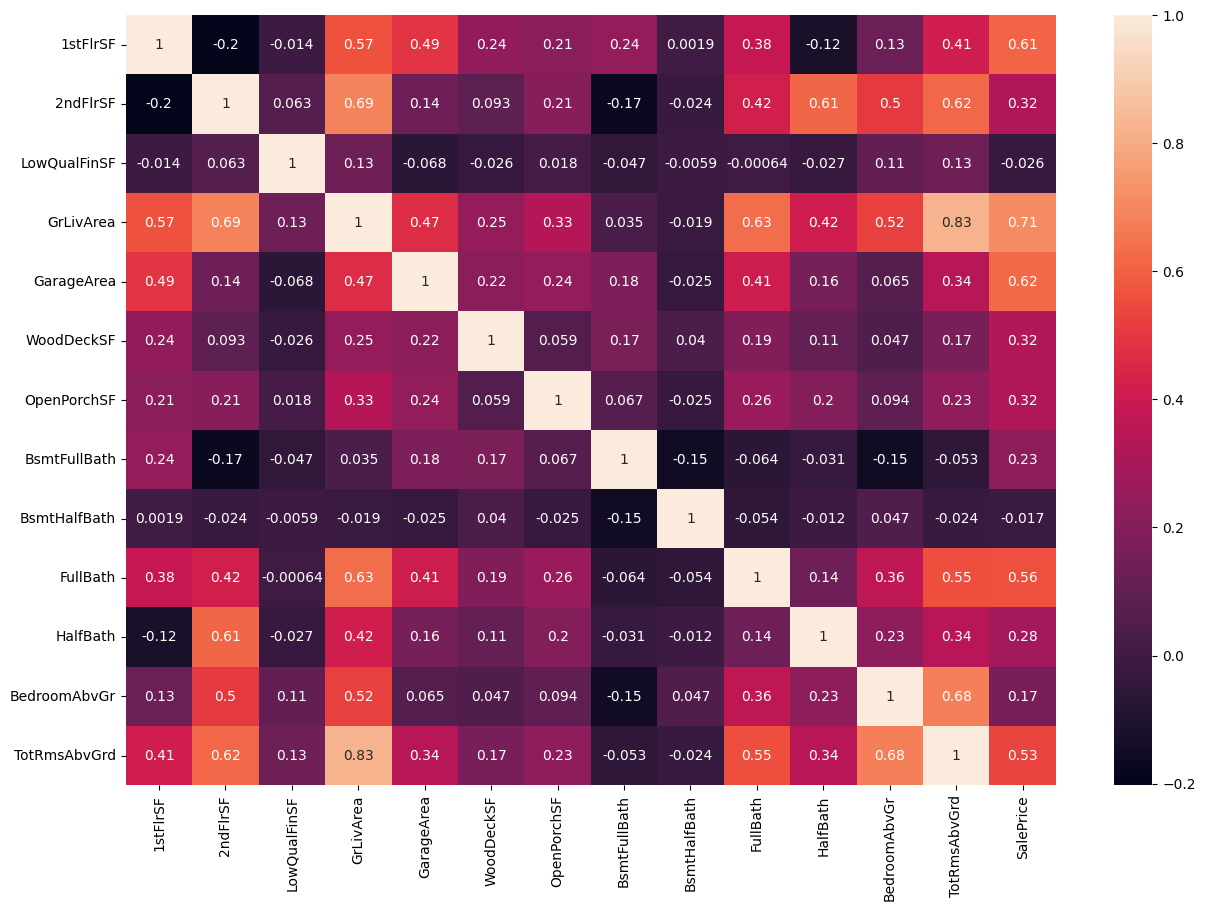

In [64]:
corr = fdata.corr()[:-1]
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(data = corr, color = 'blue', annot = True, ax = ax)
plt.xticks(rotation = 90)
plt.show()

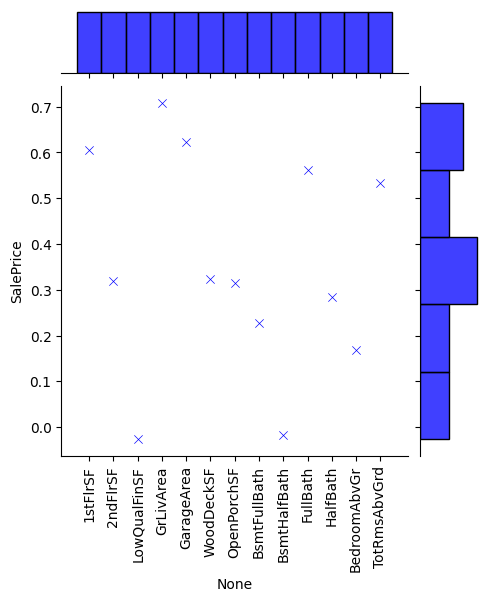

In [65]:
sns.jointplot(data = corr.SalePrice, kind = 'scatter', color = 'blue', height=5, marker = 'x')
plt.xticks(rotation = 90)
plt.show()

In [66]:
main_features = list()
# corr.SalePrice[:-1][abs(corr.SalePrice[:-1]) > 0.25]
corr = fdata.corr()
abs(corr.SalePrice[:-1]).sort_values()

BsmtHalfBath    0.016953
LowQualFinSF    0.025663
BedroomAbvGr    0.168310
BsmtFullBath    0.226846
HalfBath        0.283869
OpenPorchSF     0.315858
2ndFlrSF        0.319862
WoodDeckSF      0.324191
TotRmsAbvGrd    0.533945
FullBath        0.561210
1stFlrSF        0.605770
GarageArea      0.623369
GrLivArea       0.708919
Name: SalePrice, dtype: float64

## `3. Handling Outliers`

(1459, 14)


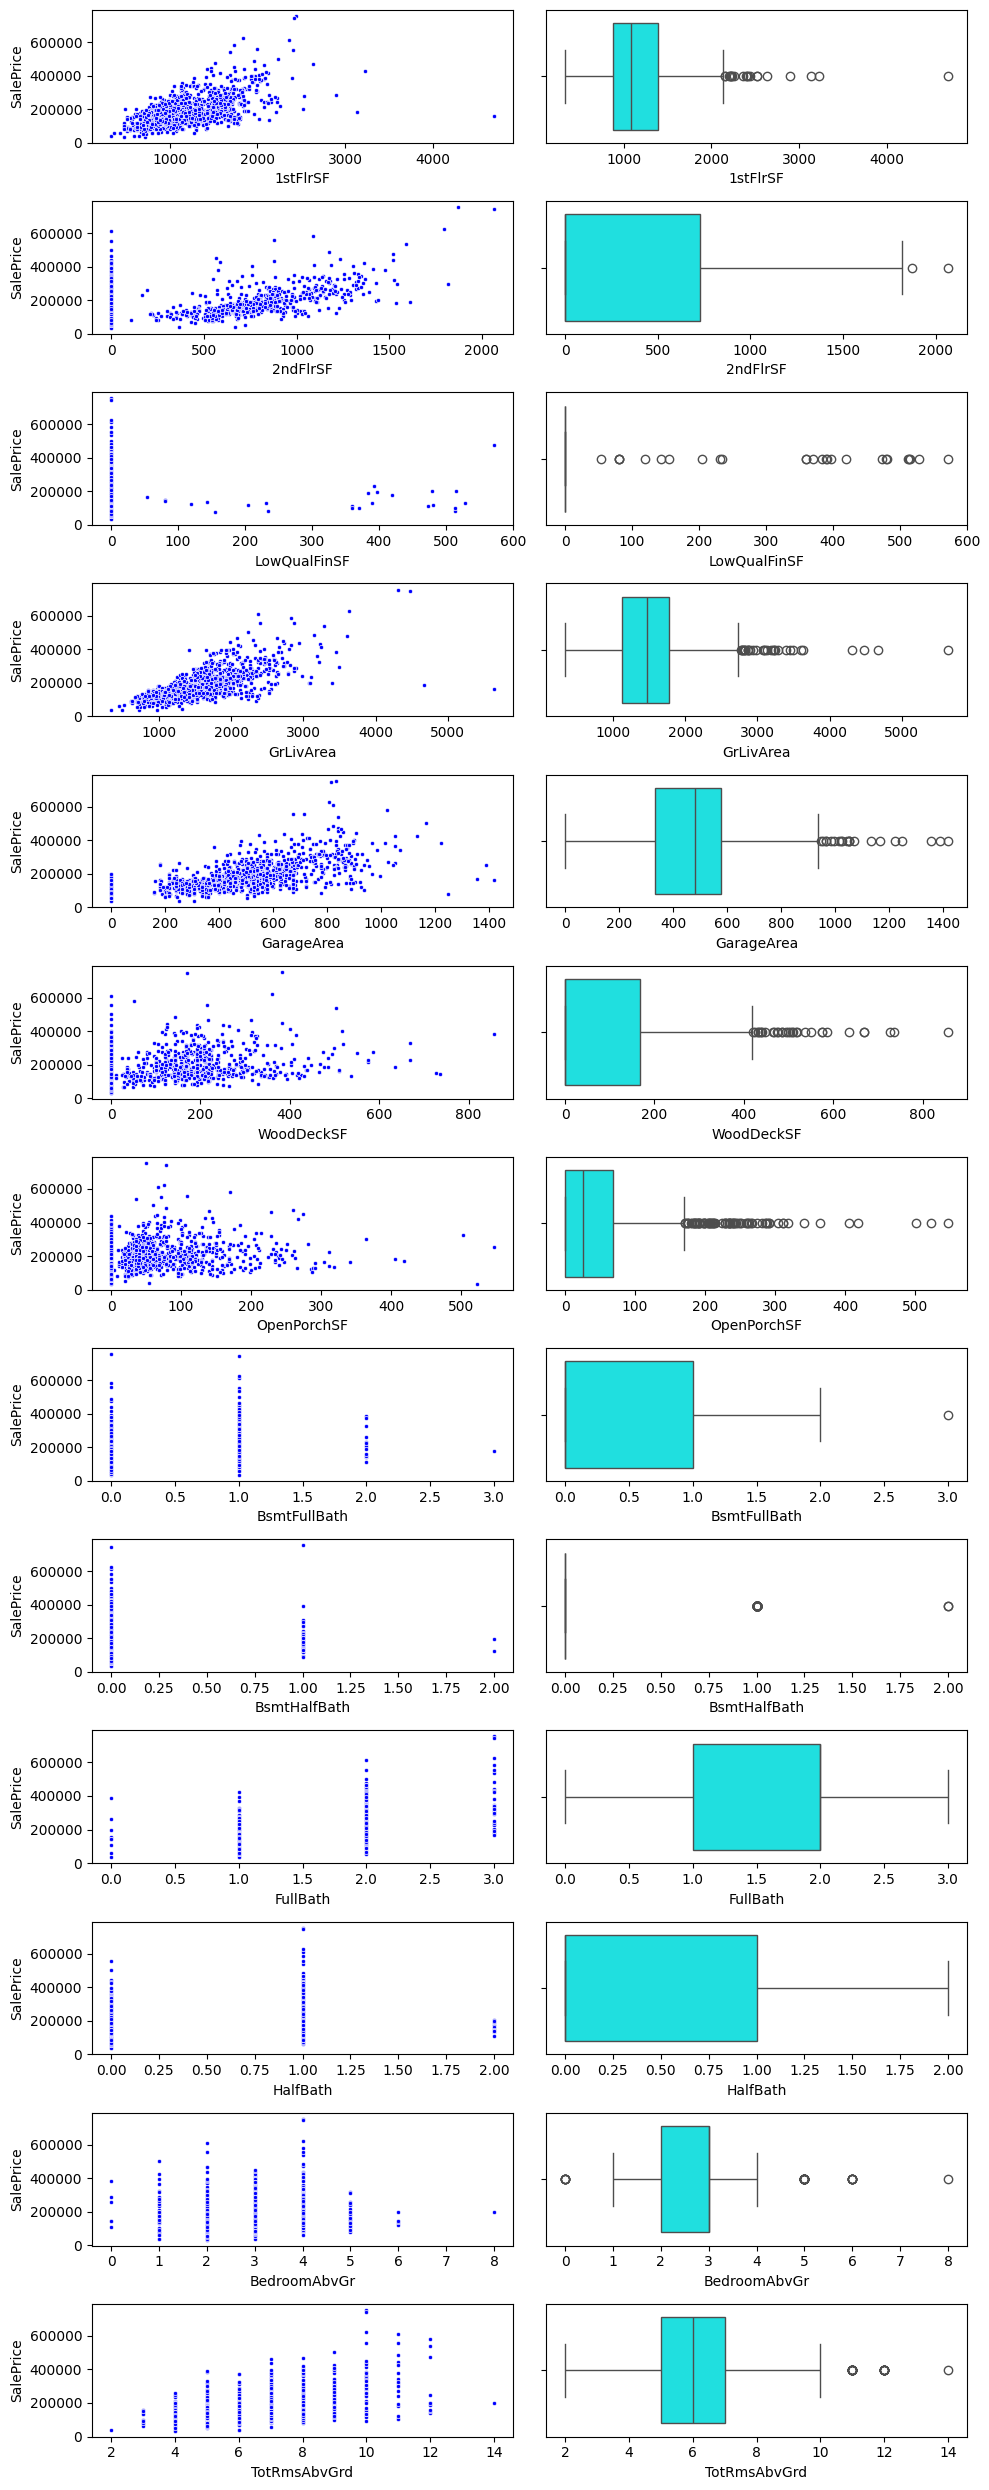

In [67]:
# boxplots of each feature
print(fdata.shape)
fig, ax = plt.subplots(nrows = len(fdata.columns) - 1, ncols = 2, figsize = (10,25))
for index, col in enumerate(fdata.columns[:-1]):
    sns.scatterplot(x = fdata[col] ,y = fdata['SalePrice'], ax = ax[index][0], marker = '.', color = 'blue')
    sns.boxplot(x = fdata[col], ax = ax[index][1], color = 'cyan')
plt.tight_layout()
plt.show()

In [68]:
fdata.columns

Index(['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'SalePrice'],
      dtype='object')

In [69]:
try:
    fdata = fdata[fdata['1stFlrSF'] <= 2000]
    fdata = fdata[fdata['GrLivArea'] <= 2500]
    fdata = fdata[fdata['GarageArea'] <= 1000]
    fdata = fdata[fdata['BsmtFullBath'] <= 1]
    fdata = fdata[fdata['BsmtHalfBath'] <= 0]
    fdata = fdata[fdata['BedroomAbvGr'] <= 4]
    fdata = fdata[fdata['BedroomAbvGr'] >= 1]
    fdata = fdata[fdata['TotRmsAbvGrd'] <= 10]
except: 
    pass

(1240, 14)


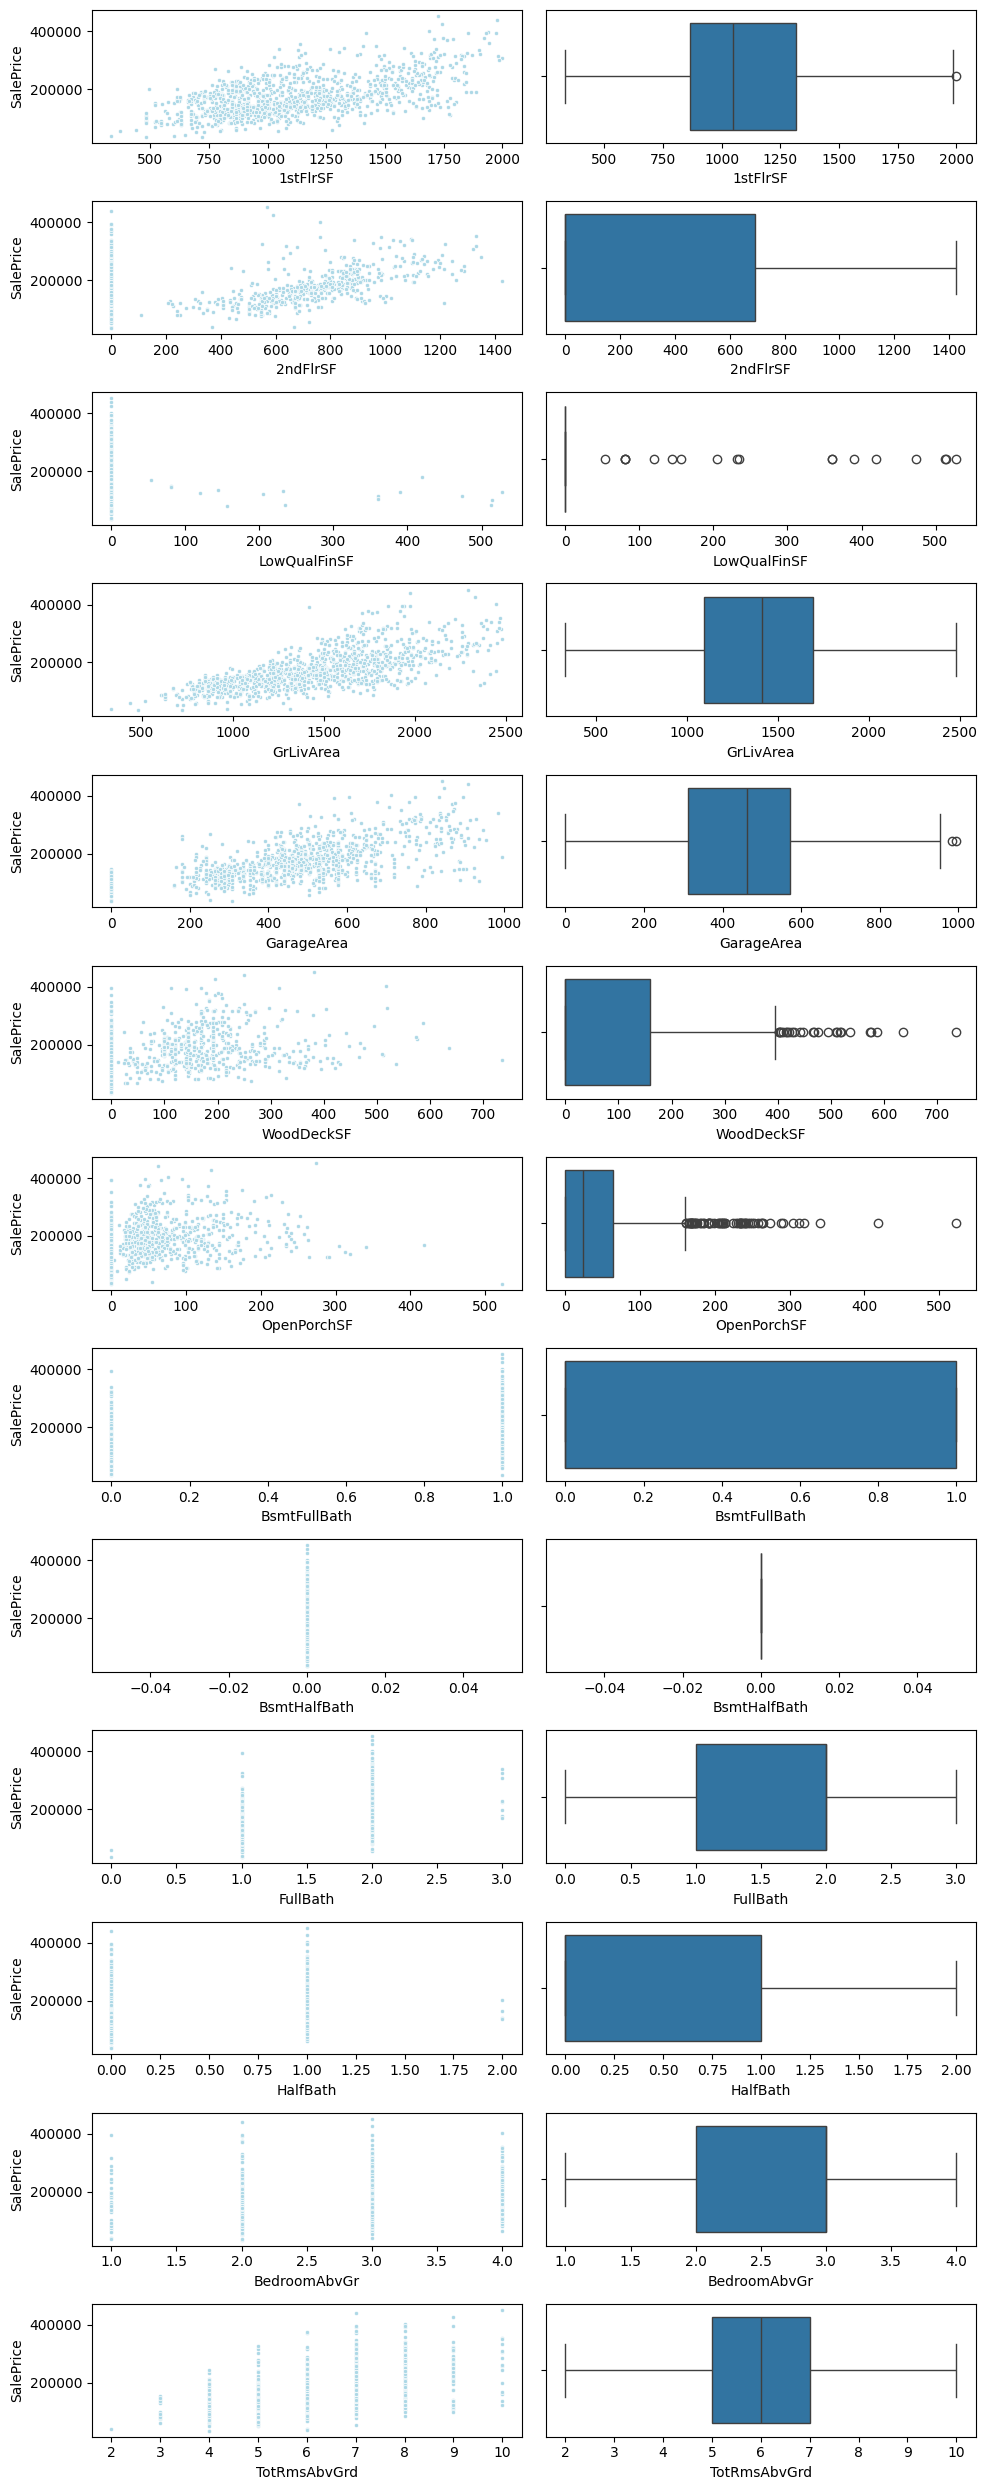

In [70]:
# boxplots of each feature
print(fdata.shape)
fig, ax = plt.subplots(nrows = len(fdata.columns) - 1, ncols = 2, figsize = (10,25))
for index, col in enumerate(fdata.columns[:-1]):
    sns.scatterplot(x = fdata[col],y = fdata['SalePrice'], ax = ax[index][0], marker = '.', color = 'lightblue')
    sns.boxplot(x = fdata[col], ax = ax[index][1])
plt.tight_layout()
plt.show()

## `4. Feature Engineering`

### `4.1 Merging 'BsmtHalfBath' and 'BsmtFullBath' , 'FullBath' and 'HalfBath'`

In [71]:
try:
    fdata.insert(7, 'TotalBath', fdata['FullBath'] + (2 * fdata['HalfBath']))
    fdata.insert(9, 'BathRatio', ((fdata['FullBath'] + fdata['HalfBath']) / fdata['TotalBath']))
except: 
    # fdata.drop(columns=['BsmtTotalBath', 'TotalBath'], inplace = True)
    pass
fdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1240 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1stFlrSF      1240 non-null   int64  
 1   2ndFlrSF      1240 non-null   int64  
 2   LowQualFinSF  1240 non-null   int64  
 3   GrLivArea     1240 non-null   int64  
 4   GarageArea    1240 non-null   int64  
 5   WoodDeckSF    1240 non-null   int64  
 6   OpenPorchSF   1240 non-null   int64  
 7   TotalBath     1240 non-null   int64  
 8   BsmtFullBath  1240 non-null   int64  
 9   BathRatio     1239 non-null   float64
 10  BsmtHalfBath  1240 non-null   int64  
 11  FullBath      1240 non-null   int64  
 12  HalfBath      1240 non-null   int64  
 13  BedroomAbvGr  1240 non-null   int64  
 14  TotRmsAbvGrd  1240 non-null   int64  
 15  SalePrice     1240 non-null   int64  
dtypes: float64(1), int64(15)
memory usage: 164.7 KB


### `4.2 Checking for Null Values in Newly added features`

In [72]:
fdata.isnull().sum()

1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
TotalBath       0
BsmtFullBath    0
BathRatio       1
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
SalePrice       0
dtype: int64

In [73]:
fdata = fdata.fillna(method = 'ffill')
fdata.isnull().sum()

1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
TotalBath       0
BsmtFullBath    0
BathRatio       0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
SalePrice       0
dtype: int64

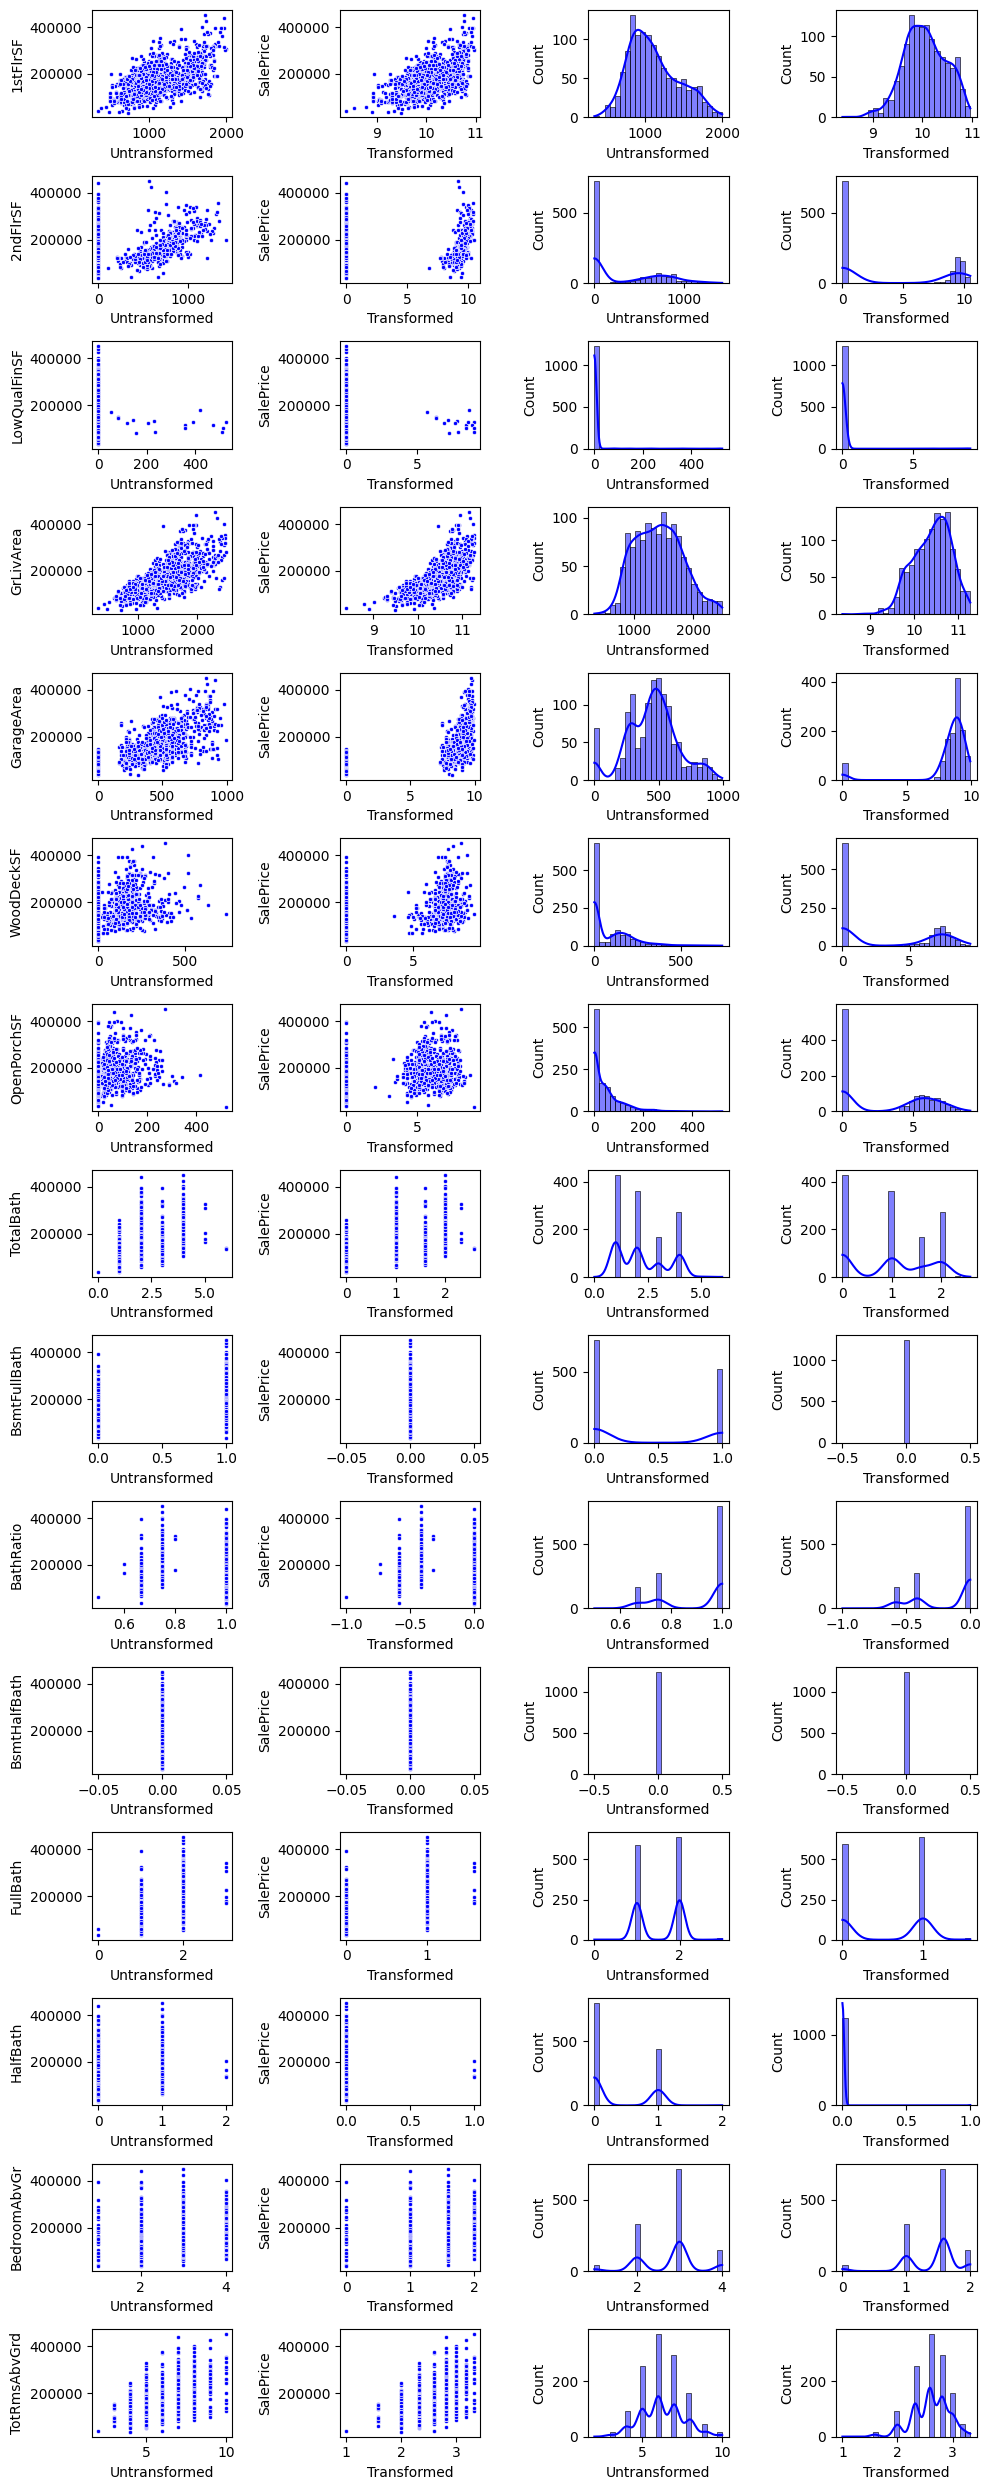

In [74]:
fig, ax = plt.subplots(nrows=len(fdata.columns) - 1, ncols=4, figsize=(10, 25))

for index, col in enumerate(fdata.columns[:-1]):
    sns.scatterplot(x=fdata[col], y=fdata.SalePrice, ax=ax[index, 0], marker='.', color='blue')
    ax[index, 0].set_xlabel('Untransformed')
    ax[index, 0].set_ylabel(col)
    
    transformed_col = np.log2(fdata[col].replace(0, np.nan)).fillna(0)
    sns.scatterplot(x=transformed_col, y=fdata.SalePrice, ax=ax[index, 1], marker='.', color='blue')
    ax[index, 1].set_xlabel('Transformed')
    
    sns.histplot(fdata[col], ax=ax[index, 2], color='blue', kde=True, bins = 25)
    ax[index, 2].set_xlabel('Untransformed')
    
    sns.histplot(transformed_col, ax=ax[index, 3], color='blue', kde=True, bins = 25)
    ax[index, 3].set_xlabel('Transformed')

plt.tight_layout()
plt.show()

LowQualFinSF    0.083535
BedroomAbvGr    0.184066
BathRatio       0.188483
BsmtFullBath    0.242666
HalfBath        0.244437
2ndFlrSF        0.245614
WoodDeckSF      0.322852
OpenPorchSF     0.351527
TotalBath       0.460758
TotRmsAbvGrd    0.507263
FullBath        0.583990
1stFlrSF        0.587158
GarageArea      0.642347
GrLivArea       0.707372
SalePrice       1.000000
BsmtHalfBath         NaN
Name: SalePrice, dtype: float64


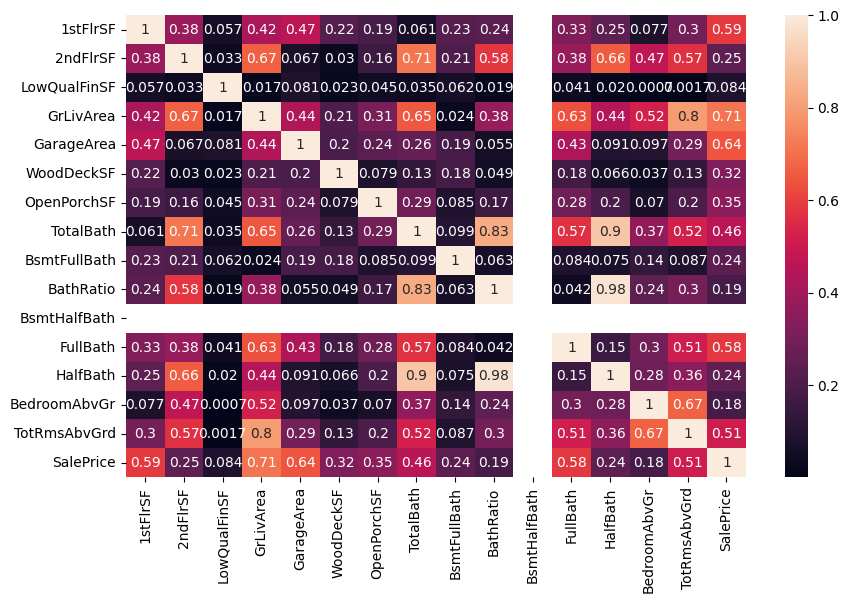

In [75]:
corr = abs(fdata.corr())
print(corr.SalePrice.sort_values())
fig, ax = plt.subplots(figsize=(10, 6))  
sns.heatmap(data=corr, annot=True, ax=ax)
plt.show()

- Better to remove <b>BsmtHalfBath</b> and <b>BsmtBathRatio</b>

In [76]:
try : fdata.drop(columns=['BsmtHalfBath'], inplace = True)
except: pass

LowQualFinSF    0.083535
BedroomAbvGr    0.184066
BathRatio       0.188483
BsmtFullBath    0.242666
HalfBath        0.244437
2ndFlrSF        0.245614
WoodDeckSF      0.322852
OpenPorchSF     0.351527
TotalBath       0.460758
TotRmsAbvGrd    0.507263
FullBath        0.583990
1stFlrSF        0.587158
GarageArea      0.642347
GrLivArea       0.707372
SalePrice       1.000000
Name: SalePrice, dtype: float64


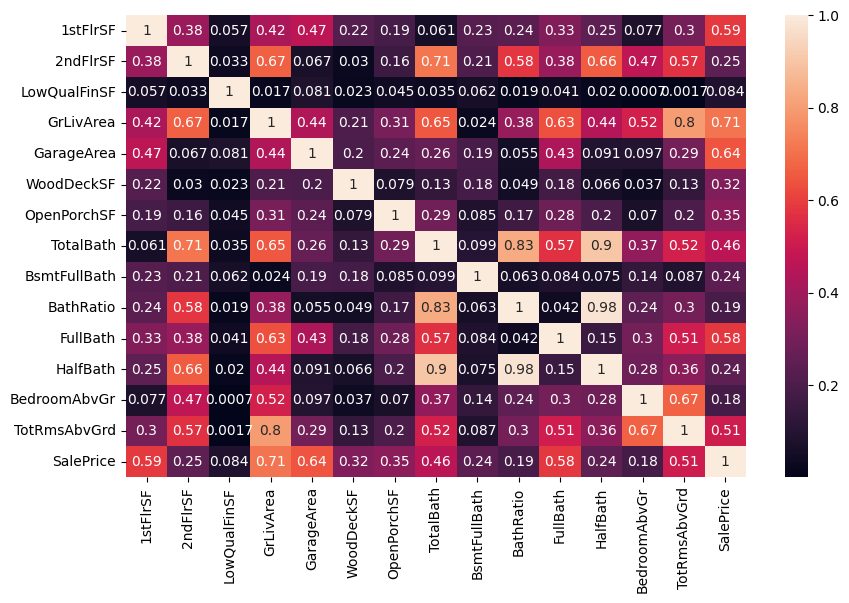

In [77]:
corr = abs(fdata.corr())
print(corr.SalePrice.sort_values())
fig, ax = plt.subplots(figsize=(10, 6))  
sns.heatmap(data=corr, annot=True, ax=ax)
plt.show()

In [78]:
fdata.to_csv('refined_dataset.csv', index = False)

## `5. Model Training`

### `5.1 Training Pipeline`

In [79]:
def training():
    scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
    models = [LinearRegression(), Lasso(), Ridge()]
    
    X = fdata.iloc[:,:-1]
    Y = fdata.SalePrice
    
    results = []
    
    for scaler in scalers:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123)
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        for model in models:
            trained_model = model.fit(X_train, y_train)
            pred = trained_model.predict(X_test)
            
            mse = mean_squared_error(y_test, pred)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test, pred)
            mape = mean_absolute_percentage_error(y_test, pred)
            r2 = r2_score(y_test, pred)
            
            result = {
                'model': model,
                'scaler': scaler,
                'mse': mse,
                'rmse': rmse,
                'mae': mae,
                'mape': mape,
                'r2': r2
            }
            
            results.append(result)
            
            print(model, scaler)
            print(f'mse -> {mse}')
            print(f'rmse -> {rmse}')
            print(f'mae -> {mae}')
            print(f'mape -> {mape}')
            print(f'r2 -> {r2}', '\n')
            
        # best model on r2 score
    best_result = max(results, key=lambda x: x['r2'])

    print("Best Model:")
    print(f"Model: {best_result['model']}")
    print(f"Scaler: {best_result['scaler']}")
    print(f"R2 Score: {best_result['r2']}")
    print(f"MSE: {best_result['mse']}")
    print(f"RMSE: {best_result['rmse']}")
    print(f"MAE: {best_result['mae']}")
    print(f"MAPE: {best_result['mape']} \n")

In [80]:
training()

LinearRegression() StandardScaler()
mse -> 985573375.6678534
rmse -> 31393.842957940866
mae -> 23779.399122347546
mape -> 0.16006447399891216
r2 -> 0.7481793678932988 

Lasso() StandardScaler()
mse -> 984708943.8970877
rmse -> 31380.072401081034
mae -> 23759.153163904633
mape -> 0.15979613201477813
r2 -> 0.7484002360298592 

Ridge() StandardScaler()
mse -> 984452121.2153317
rmse -> 31375.98000406253
mae -> 23759.95441942223
mape -> 0.15979726068250133
r2 -> 0.7484658559539112 

LinearRegression() MinMaxScaler()
mse -> 984714243.0414228
rmse -> 31380.156835832146
mae -> 23759.091987420266
mape -> 0.15979588428792682
r2 -> 0.7483988820628091 

Lasso() MinMaxScaler()
mse -> 984738443.6686752
rmse -> 31380.542437451193
mae -> 23759.691271110103
mape -> 0.15979858493061308
r2 -> 0.7483926986396338 

Ridge() MinMaxScaler()
mse -> 984947940.6518157
rmse -> 31383.880267612156
mae -> 23753.404734048807
mape -> 0.1594996420112479
r2 -> 0.7483391707501622 

LinearRegression() RobustScaler()
mse -

### `5.2 HyperParameter Tuning for the best model`

In [81]:
# using GridSearchCV
model = Ridge()
rs = RobustScaler(unit_variance=True)

X = fdata.iloc[:,:-1]
Y = fdata.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123)
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

params = {
    'alpha':[0.1, 0.01, 0.001, 0.0001, 0.00001], 
    'fit_intercept':[True, False],
    'copy_X':[True, False],
    'max_iter':np.arange(1000,10000,1000),
    'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
    'positive':[True, False],
}

gs = GridSearchCV(estimator=Ridge(), param_grid=params, n_jobs=-1, verbose=4)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'max_iter': array([1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]),
                         'positive': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']},
             verbose=4)

In [82]:
r_bps = gs.best_params_
print(r_bps)

{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': np.int64(1000), 'positive': False, 'solver': 'lsqr'}


In [83]:
model = Ridge(alpha = r_bps['alpha'], 
              fit_intercept = r_bps['fit_intercept'], 
             copy_X = r_bps['copy_X'], 
            max_iter = r_bps['max_iter'], 
              solver = r_bps['solver'], 
              positive = r_bps['positive'], 
             )

r_trained_model = model.fit(X_train, y_train)
pred = r_trained_model.predict(X_test)

In [84]:
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f'R2 Score: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

R2 Score: 0.7483714489650275
MSE: 984821610.4582996
RMSE: 31381.867542552332
MAE: 23761.8569032373
MAPE: 0.15983943348725752


### `5.3 Traning Linear Regression Model`

In [85]:
# using GridSearchCV
model = LinearRegression()
rs = RobustScaler(unit_variance=True)

X = fdata.iloc[:,:-1]
Y = fdata.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123)
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

params = {
    'fit_intercept':[True, False],
    'copy_X':[True, False],
    'n_jobs':np.arange(1,100,1),
    'positive':[True, False],
}

gs = GridSearchCV(estimator=LinearRegression(), param_grid=params, n_jobs=-1, verbose=4)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 792 candidates, totalling 3960 fits


GridSearchCV(estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'positive': [True, False]},
             verbose=4)

In [86]:
lr_bps = gs.best_params_
print(lr_bps)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': np.int64(1), 'positive': False}


In [87]:
model = LinearRegression(fit_intercept= lr_bps['fit_intercept'], 
              copy_X = lr_bps['copy_X'], 
              n_jobs = lr_bps['n_jobs'],
            positive = lr_bps['positive']
             )

lr_trained_model = model.fit(X_train, y_train)
pred = lr_trained_model.predict(X_test)

In [88]:
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f'R2 Score: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

R2 Score: 0.7483988820628072
MSE: 984714243.0414301
RMSE: 31380.15683583226
MAE: 23759.091987420445
MAPE: 0.15979588428792782


## `6. Exporting Model`

In [89]:
models_path = 'models'
joblib.dump(r_trained_model, filename='Linear_Regression_l2Regularizer_model.pkl')
joblib.dump(lr_trained_model, 'Linear_Regression_model.pkl')

['Linear_Regression_model.pkl']

In [90]:
fdata.columns

Index(['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'TotalBath', 'BsmtFullBath', 'BathRatio',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'SalePrice'],
      dtype='object')

In [93]:
fdata.head(7)

,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,TotalBath,BsmtFullBath,BathRatio,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
0,856,854,0,1710,548,0,61,4,1,0.750000,2,1,3,8,208500
2,920,866,0,1786,608,0,42,4,1,0.750000,2,1,3,6,223500
3,961,756,0,1717,642,0,35,1,1,1.000000,1,0,3,7,140000
4,1145,1053,0,2198,836,192,84,4,1,0.750000,2,1,4,9,250000
5,796,566,0,1362,480,40,30,3,1,0.666667,1,1,1,5,143000
6,1694,0,0,1694,636,255,57,2,1,1.000000,2,0,3,7,307000
7,1107,983,0,2090,484,235,204,4,1,0.750000,2,1,3,7,200000


In [92]:
print('done')

done
